In [1]:
##import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data,
df = pd.read_csv('C:/Users/VRINDA/Desktop/PROJECTS/bank customer segmentation/german_credit.csv',index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [3]:
df.shape

(1000, 9)

In [4]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 58.6+ KB


In [6]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [7]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [8]:
print('Unique values in each categorical column : ')
for col in df.select_dtypes(include = [object]):
    print(col , ' : ', df[col].unique())

Unique values in each categorical column : 
Sex  :  ['male' 'female']
Housing  :  ['own' 'free' 'rent']
Saving accounts  :  [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account  :  ['little' 'moderate' nan 'rich']
Purpose  :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


## Exploratory Data Analysis

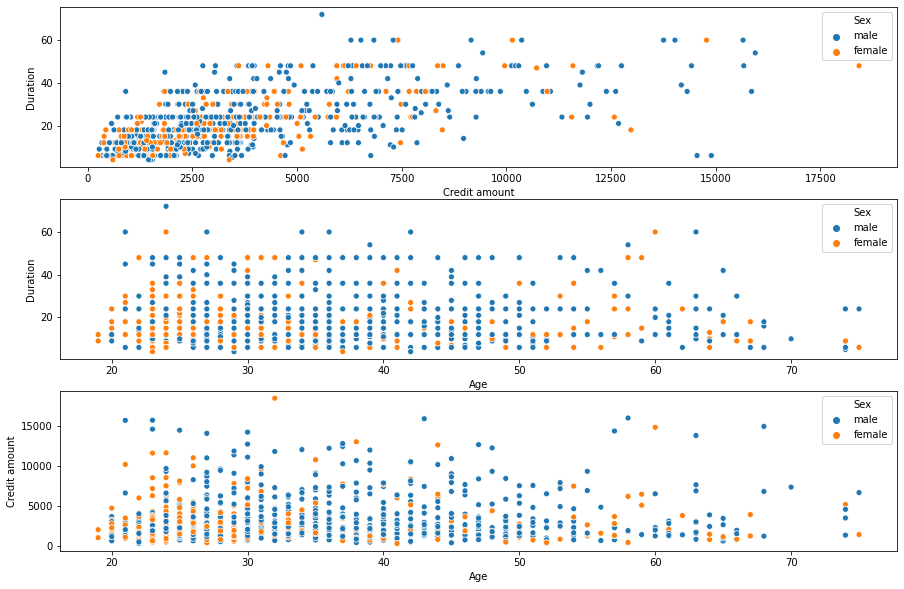

In [9]:
def scatters(df, h=None):
    fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize= (15,10))
    sns.scatterplot(x = 'Credit amount', y = 'Duration', hue = h , data = df ,ax = ax1)
    sns.scatterplot(x = 'Age', y = 'Duration', hue = h , data = df ,ax = ax2)
    sns.scatterplot(x = 'Age', y = 'Credit amount', hue = h , data = df ,ax = ax3)
    plt.savefig('C:/Users/VRINDA/Desktop/PROJECTS/bank customer segmentation/images/scatters.jpg')
scatters(df, h='Sex')

#### Observations
- The general impression is that women tend to be younger than men. 
- The top plot shows that there is no clear difference between men and women in terms of amount and duration of the credit. 

In [10]:
import scipy.stats as stats

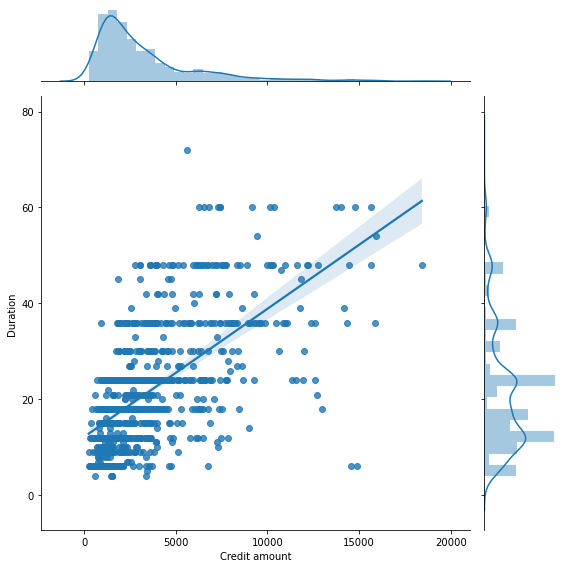

In [11]:
sns.jointplot(x="Credit amount",y="Duration", data=df, kind="reg", height=8)

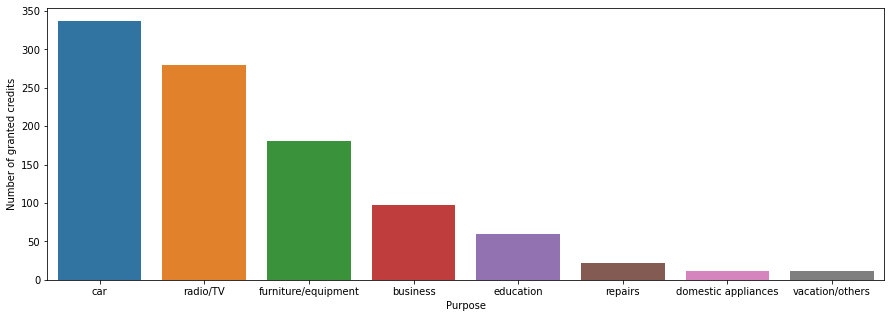

In [12]:
n_credits = df.groupby("Purpose")['Age'].count().rename("Age").reset_index()
n_credits.sort_values(by=["Age"], ascending=False, inplace=True)
plt.figure(figsize= (15,5))
bar = sns.barplot(x= 'Purpose',y='Age',data=n_credits)
plt.ylabel("Number of granted credits")
plt.savefig('C:/Users/VRINDA/Desktop/PROJECTS/bank customer segmentation/images/PurposevsAge.jpg')

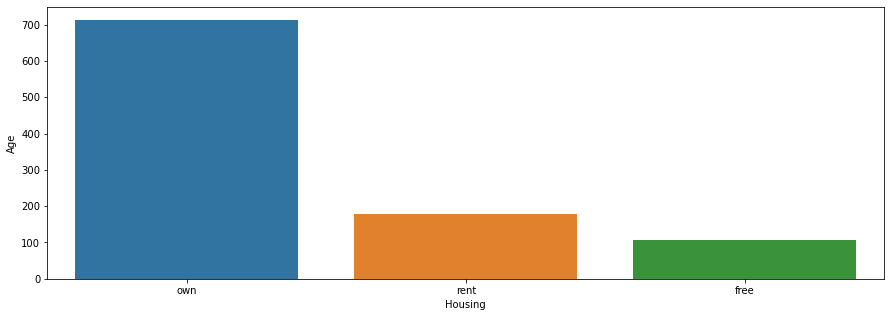

In [13]:
n_credits = df.groupby("Housing")['Age'].count().rename("Age").reset_index()
n_credits.sort_values(by=["Age"], ascending=False, inplace=True)
plt.figure(figsize= (15,5))
bar = sns.barplot(x= 'Housing',y='Age',data=n_credits)
plt.savefig('C:/Users/VRINDA/Desktop/PROJECTS/bank customer segmentation/images/Housing.jpg')

Text(0.5, 0, 'Age')

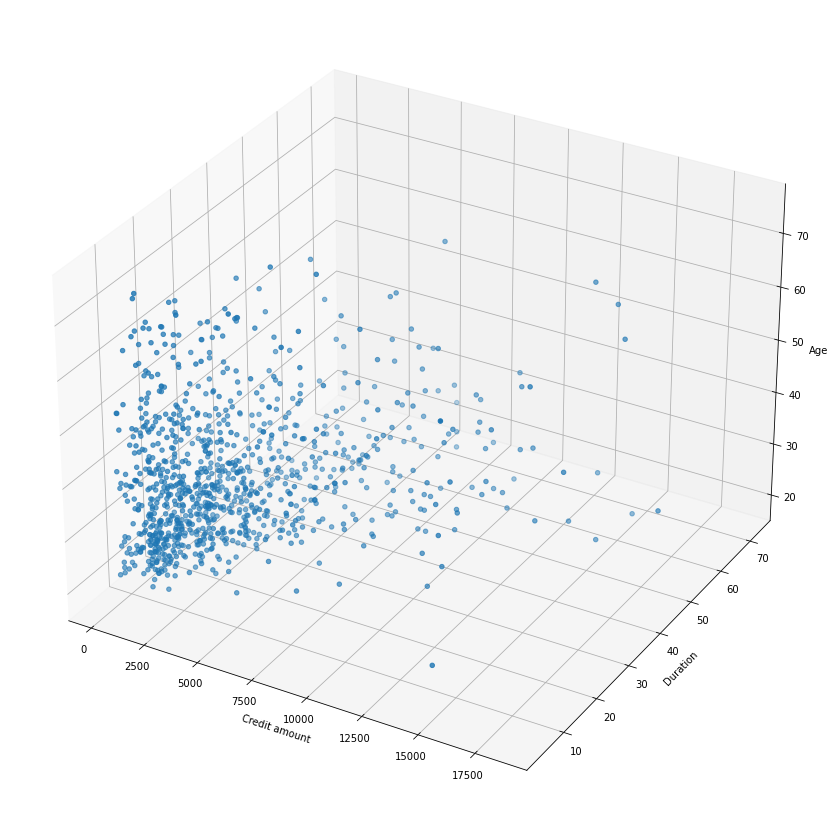

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Credit amount"], df["Duration"], df["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

## Clustering with KMeans

In [15]:
#Selecting columns for clusterisation with k-means
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = df.loc[:,selected_cols]

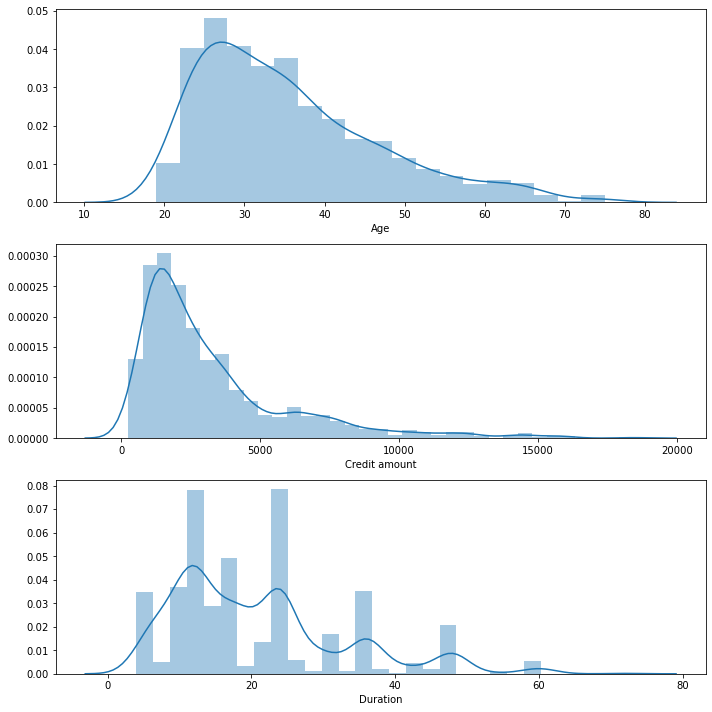

In [16]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,10))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()
    plt.savefig('C:/Users/VRINDA/Desktop/PROJECTS/bank customer segmentation/images/distributions.jpg')
    
distributions(cluster_data)

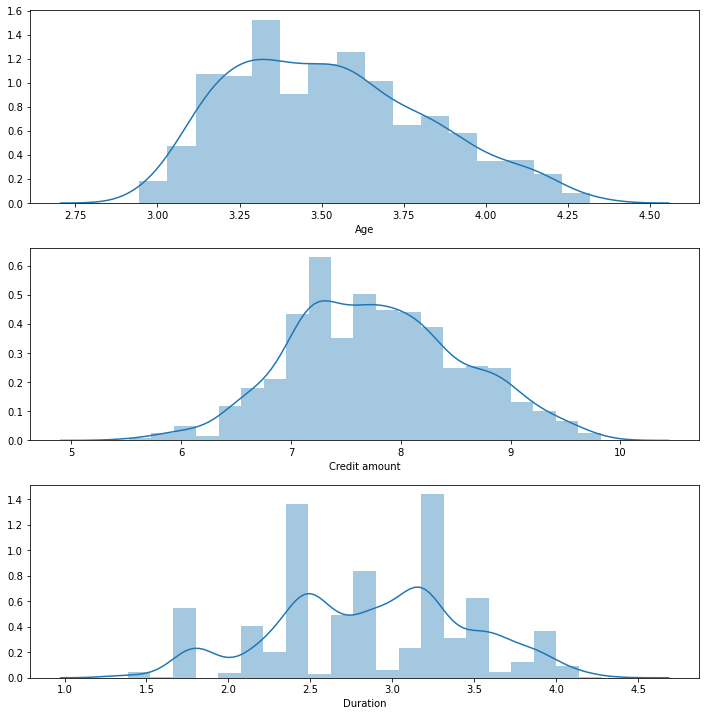

In [17]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)
plt.savefig('C:/Users/VRINDA/Desktop/PROJECTS/bank customer segmentation/images/lo_distributions.jpg')

### Observations
- Indeed, the skewness has been eliminated.
- The next step will be centering and scaling of variables – it is required by KMeans algorithm. 
- We will use for that a StandardScaler from sklearn library.

In [18]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [19]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

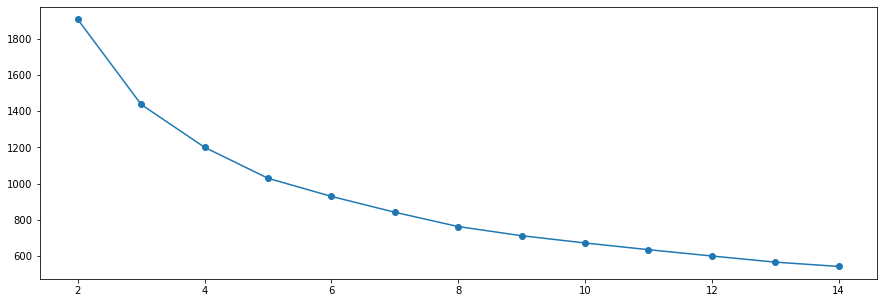

In [21]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(clusters_range,inertias, marker='o')
plt.savefig('C:/Users/VRINDA/Desktop/PROJECTS/bank customer segmentation/images/kmeans.jpg')

In [22]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

In [23]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Credit amount,Duration
Cluster,,,
0,34.0,5665.4,32.2
1,48.7,1979.7,13.9
2,27.8,1732.2,14.2


### Results

- **Cluster 0**– lower mean of credit amount, short duration, older customers  

- **Cluster 1**– high mean of credit amount, long duration, middle-aged customers  

- **Cluster 2** - lower mean of credit amount, short duration, young customers  